In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp
gpp.set_aesthetics(context = 'paper')
from sklearn.metrics import f1_score

In [107]:
#load crispri data
crispri_df = pd.read_csv('../../Data/offTargetAnalysis/CleanedOffTargetTiling.csv')
crispri_df

/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_6228/2574646343.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  crispri_df = pd.read_csv('../../Data/offTargetAnalysis/CleanedOffTargetTiling.csv')


,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore,gene_avg_zscore,Unnamed: 17,label,promiscuous
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.1532,-24.0,0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982,-0.857051,0.137831,nonpromiscuous,nonpromiscuous,False
1,CYP7A1,Non-essential,58500163.0,AAAAAAAAAGTGGTAGTAAC,TAGAAAAAAAAAAGTGGTAGTAACTGGCCT,-0.2355,-121.0,-0.292964,-1.334599,-0.183103,-0.920208,-0.069267,-0.811182,0.119249,-0.389626,-0.863904,0.003741,nonpromiscuous,nonpromiscuous,False
2,IL22,Non-essential,68253604.0,AAAAAAAAGTCAGTATCCTG,AATTAAAAAAAAGTCAGTATCCTGGGGGCT,-0.1535,-39.0,0.410484,0.539497,0.152376,-0.105570,-0.168406,-1.051176,0.264744,-0.006253,-0.155875,0.051320,nonpromiscuous,nonpromiscuous,False
3,DEFB126,Non-essential,142591.0,AAAAAAACAAAAGTGAAATG,AGCAAAAAAAACAAAAGTGAAATGAGGCAG,0.1482,410.0,0.231700,0.063188,-0.041797,-0.577077,-0.334828,-1.454046,-0.050205,-0.836125,-0.701015,0.173317,nonpromiscuous,nonpromiscuous,False
4,IL22,Non-essential,68253604.0,AAAAAAAGTCAGTATCCTGG,ATTAAAAAAAAGTCAGTATCCTGGGGGCTA,0.3508,-38.0,0.350938,0.380855,0.009976,-0.451357,0.336373,0.170781,0.782455,1.357887,0.364541,0.051320,nonpromiscuous,nonpromiscuous,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33226,ONE_INTERGENIC_874,ONE_INTERGENICO_CTL,NaN,TTTGATCTGTAGCAGATGAC,NaN,NaN,NaN,0.323391,0.307466,0.545505,0.849061,0.104767,-0.389885,0.512509,0.646595,0.353309,NaN,nonpromiscuous,nonpromiscuous,False
33227,ONE_INTERGENIC_70,ONE_INTERGENICO_CTL,NaN,TTTGGAATTATCATCGTCGT,NaN,NaN,NaN,0.214765,0.018071,0.267283,0.173456,0.450597,0.447290,0.472803,0.541969,0.295197,NaN,nonpromiscuous,nonpromiscuous,False
33228,ONE_INTERGENIC_108,ONE_INTERGENICO_CTL,NaN,TTTGGAGTGATATTCGAACA,NaN,NaN,NaN,0.353744,0.388331,-0.581978,-1.888791,0.423880,0.382615,-0.002250,-0.709769,-0.456903,NaN,nonpromiscuous,nonpromiscuous,False
33229,ONE_INTERGENIC_33,ONE_INTERGENICO_CTL,NaN,TTTGGCAGTCTATTACGGTA,NaN,NaN,NaN,0.103618,-0.278042,0.155628,-0.097672,-0.150519,-1.007875,0.194114,-0.192360,-0.393987,NaN,nonpromiscuous,nonpromiscuous,False


In [108]:
#load crisprko data
crisprko_df = pd.read_csv('../../Data/CRISPRkoData/deweirdt2022tiling_nonessentials_zscored.csv')
crisprko_df

,sgRNA Sequence,Target Sequence,On-target Gene Symbols,noness_targeting,z_scored_sgRNA_lfc,gene_average_zscore,promiscuous
0,AAAAAAGTATGACCACCATG,AAAAAAGTATGACCACCATG,OR2D2,True,0.851431,0.246808,False
1,AAAAACGCAAACATCGTGCA,AAAAACGCAAACATCGTGCA,PIWIL3,True,0.860048,0.077394,False
2,AAAAAGAACCACGAAGAGGT,AAAAAGAACCACGAAGAGGT,KRT28,True,-1.313654,-0.367523,False
3,AAAAAGACAAAAGAAGAGGT,AAAAAGACAAAAGAAGAGGT,KCNK10,True,0.935358,0.371686,False
4,AAAAAGCAAGGAGAGCACAT,AAAAAGCAAGGAGAGCACAT,NLRP4,True,1.061142,0.152342,False
...,...,...,...,...,...,...,...
9818,TTTGTAGCTGAGCACCAGCA,TTTGTAGCTGAGCACCAGCA,"IFNA10,IFNA16,IFNA17,IFNA21,IFNA4",True,0.336793,-2.912104,False
9819,TTTGTCCAATCAGATCATAC,TTTGTCCAATCAGATCATAC,GABRA6,True,-0.787352,0.304585,False
9820,TTTGTGAACCAACACCTGTG,TTTGTGAACCAACACCTGTG,INS,True,0.438714,-0.638939,False
9821,TTTGTGGGGCTCAAGAAGGT,TTTGTGGGGCTCAAGAAGGT,KRT76,True,0.572789,-0.882456,False


In [109]:
#merge with designs to get RS3 Sequence scores and context sequences
crisprko_designs = pd.read_table('../../Data/CRISPRkoData/rs3val_nonessentialscleaned_scoredrs3seq_notarget-sgrna-designs.txt')
crisprko_scored = crisprko_df.merge(crisprko_designs[['sgRNA Sequence','sgRNA Context Sequence','On-Target Efficacy Score']].drop_duplicates(),
                                    on = 'sgRNA Sequence', how = 'inner')
crisprko_scored

,sgRNA Sequence,Target Sequence,On-target Gene Symbols,noness_targeting,z_scored_sgRNA_lfc,gene_average_zscore,promiscuous,sgRNA Context Sequence,On-Target Efficacy Score
0,AAAAAAGTATGACCACCATG,AAAAAAGTATGACCACCATG,OR2D2,True,0.851431,0.246808,False,CCATAAAAAAGTATGACCACCATGAGGTGG,0.2107
1,AAAAACGCAAACATCGTGCA,AAAAACGCAAACATCGTGCA,PIWIL3,True,0.860048,0.077394,False,TTTGAAAAACGCAAACATCGTGCAAGGCAG,0.3307
2,AAAAAGAACCACGAAGAGGT,AAAAAGAACCACGAAGAGGT,KRT28,True,-1.313654,-0.367523,False,TCTCAAAAAGAACCACGAAGAGGTAGGAGA,0.3146
3,AAAAAGACAAAAGAAGAGGT,AAAAAGACAAAAGAAGAGGT,KCNK10,True,0.935358,0.371686,False,GTCCAAAAAGACAAAAGAAGAGGTAGGACC,0.6529
4,AAAAAGCAAGGAGAGCACAT,AAAAAGCAAGGAGAGCACAT,NLRP4,True,1.061142,0.152342,False,TTTGAAAAAGCAAGGAGAGCACATTGGATT,0.4398
...,...,...,...,...,...,...,...,...,...
10011,TTTGTAGCTGAGCACCAGCA,TTTGTAGCTGAGCACCAGCA,"IFNA10,IFNA16,IFNA17,IFNA21,IFNA4",True,0.336793,-2.912104,False,TGGATTTGTAGCTGAGCACCAGCACGGCCA,0.3727
10012,TTTGTCCAATCAGATCATAC,TTTGTCCAATCAGATCATAC,GABRA6,True,-0.787352,0.304585,False,ACTGTTTGTCCAATCAGATCATACTGGAGA,0.2891
10013,TTTGTGAACCAACACCTGTG,TTTGTGAACCAACACCTGTG,INS,True,0.438714,-0.638939,False,AGCCTTTGTGAACCAACACCTGTGCGGCTC,0.3303
10014,TTTGTGGGGCTCAAGAAGGT,TTTGTGGGGCTCAAGAAGGT,KRT76,True,0.572789,-0.882456,False,TGAGTTTGTGGGGCTCAAGAAGGTAGGTGA,0.4449


In [114]:
#Laura removed all guides with RS3 Sequence <= 0.2
crisprko_active = crisprko_scored[crisprko_scored['On-Target Efficacy Score'] > 0.2].copy()
crisprko_active

,sgRNA Sequence,Target Sequence,On-target Gene Symbols,noness_targeting,z_scored_sgRNA_lfc,gene_average_zscore,promiscuous,sgRNA Context Sequence,On-Target Efficacy Score
0,AAAAAAGTATGACCACCATG,AAAAAAGTATGACCACCATG,OR2D2,True,0.851431,0.246808,False,CCATAAAAAAGTATGACCACCATGAGGTGG,0.2107
1,AAAAACGCAAACATCGTGCA,AAAAACGCAAACATCGTGCA,PIWIL3,True,0.860048,0.077394,False,TTTGAAAAACGCAAACATCGTGCAAGGCAG,0.3307
2,AAAAAGAACCACGAAGAGGT,AAAAAGAACCACGAAGAGGT,KRT28,True,-1.313654,-0.367523,False,TCTCAAAAAGAACCACGAAGAGGTAGGAGA,0.3146
3,AAAAAGACAAAAGAAGAGGT,AAAAAGACAAAAGAAGAGGT,KCNK10,True,0.935358,0.371686,False,GTCCAAAAAGACAAAAGAAGAGGTAGGACC,0.6529
4,AAAAAGCAAGGAGAGCACAT,AAAAAGCAAGGAGAGCACAT,NLRP4,True,1.061142,0.152342,False,TTTGAAAAAGCAAGGAGAGCACATTGGATT,0.4398
...,...,...,...,...,...,...,...,...,...
10011,TTTGTAGCTGAGCACCAGCA,TTTGTAGCTGAGCACCAGCA,"IFNA10,IFNA16,IFNA17,IFNA21,IFNA4",True,0.336793,-2.912104,False,TGGATTTGTAGCTGAGCACCAGCACGGCCA,0.3727
10012,TTTGTCCAATCAGATCATAC,TTTGTCCAATCAGATCATAC,GABRA6,True,-0.787352,0.304585,False,ACTGTTTGTCCAATCAGATCATACTGGAGA,0.2891
10013,TTTGTGAACCAACACCTGTG,TTTGTGAACCAACACCTGTG,INS,True,0.438714,-0.638939,False,AGCCTTTGTGAACCAACACCTGTGCGGCTC,0.3303
10014,TTTGTGGGGCTCAAGAAGGT,TTTGTGGGGCTCAAGAAGGT,KRT76,True,0.572789,-0.882456,False,TGAGTTTGTGGGGCTCAAGAAGGTAGGTGA,0.4449


In [115]:
#since RS3 Validation tiling includes only guides with RS3 Sequence > 0.2, subset crispri data equivalently for fair comparison
crispri_active = crispri_df[(crispri_df['On-Target Efficacy Score'] > 0.2) | (crispri_df['Category'] == 'ONE_INTERGENICO_CTL')].copy()
crispri_active

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1,avg_zscore,gene_avg_zscore,Unnamed: 17,label,promiscuous
4,IL22,Non-essential,68253604.0,AAAAAAAGTCAGTATCCTGG,ATTAAAAAAAAGTCAGTATCCTGGGGGCTA,0.3508,-38.0,0.350938,0.380855,0.009976,-0.451357,0.336373,0.170781,0.782455,1.357887,0.364541,0.051320,nonpromiscuous,nonpromiscuous,False
5,PGK2,Non-essential,49787285.0,AAAAAACAAGAATAGTCCTG,TCTAAAAAAACAAGAATAGTCCTGAGGTGT,0.3387,-253.0,0.304904,0.258216,-0.146213,-0.830629,0.230213,-0.086208,0.288379,0.056023,-0.150650,0.011396,nonpromiscuous,nonpromiscuous,False
9,PRSS33,Non-essential,2787560.0,AAAAAAGTACAACTATGGCA,AAGGAAAAAAGTACAACTATGGCAGGGCTG,0.5591,-783.0,0.172468,-0.094615,0.488604,0.710887,0.363921,0.237468,-0.202567,-1.237592,-0.095963,-0.472025,nonpromiscuous,nonpromiscuous,False
10,OR2D2,Non-essential,6892500.0,AAAAAAGTATGACCACCATG,CCATAAAAAAGTATGACCACCATGAGGTGG,0.2107,737.0,0.684784,1.270275,0.592164,0.962361,0.241375,-0.059190,0.465288,0.522169,0.673904,0.117920,nonpromiscuous,nonpromiscuous,False
11,BPY2,Non-essential,22984264.0,AAAAAATAAGGCAGGTGCCA,TACAAAAAAATAAGGCAGGTGCCATGGCAG,0.2389,-322.0,-0.113912,-0.857577,-0.125426,-0.780153,0.070993,-0.471645,0.539853,0.718643,-0.347683,-0.096080,nonpromiscuous,nonpromiscuous,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33226,ONE_INTERGENIC_874,ONE_INTERGENICO_CTL,NaN,TTTGATCTGTAGCAGATGAC,NaN,NaN,NaN,0.323391,0.307466,0.545505,0.849061,0.104767,-0.389885,0.512509,0.646595,0.353309,NaN,nonpromiscuous,nonpromiscuous,False
33227,ONE_INTERGENIC_70,ONE_INTERGENICO_CTL,NaN,TTTGGAATTATCATCGTCGT,NaN,NaN,NaN,0.214765,0.018071,0.267283,0.173456,0.450597,0.447290,0.472803,0.541969,0.295197,NaN,nonpromiscuous,nonpromiscuous,False
33228,ONE_INTERGENIC_108,ONE_INTERGENICO_CTL,NaN,TTTGGAGTGATATTCGAACA,NaN,NaN,NaN,0.353744,0.388331,-0.581978,-1.888791,0.423880,0.382615,-0.002250,-0.709769,-0.456903,NaN,nonpromiscuous,nonpromiscuous,False
33229,ONE_INTERGENIC_33,ONE_INTERGENICO_CTL,NaN,TTTGGCAGTCTATTACGGTA,NaN,NaN,NaN,0.103618,-0.278042,0.155628,-0.097672,-0.150519,-1.007875,0.194114,-0.192360,-0.393987,NaN,nonpromiscuous,nonpromiscuous,False


In [116]:
crispri_active['sgRNA Context Sequence'].dropna().to_csv('../../Data/offTargetAnalysis/crispri_noness_tiling_sequences.txt', sep = '\n', index=False, header=None)
crisprko_active['sgRNA Context Sequence'].dropna().to_csv('../../Data/CRISPRkoData/crisprko_noness_tiling_sequences.txt', sep = '\n', index=False, header=None)

#### Run CRISPick with following inputs:

Reference genome: Ensembl v.113\
Mechanism: CRISPRko\
Enzyme: SpyoCas9\
On-Target Scorer: RS3seq-Chen2013+RS3target\
Off-Target Scorer: Aggregate CFD\
Targets: upload crispri_noness_tiling_sequences.txt or crisprko_noness_tiling_sequences.txt\
Report unpicked sequences

In [117]:
#read in designs with aggregate cfd scores
crispri_agg_cfd_df = pd.read_table('../../Data/CRISPickRuns/crispri_guides_crisprko_designs.txt')
crisprko_agg_cfd_df = pd.read_table('../../Data/CRISPickRuns/crisprko_guides_crisprko_designs.txt')
crisprko_agg_cfd_df

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Transcript,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,...,Other Target Matches,Aggregate CFD Score,Off-Target CFD100 Hits,Off-Target Tier I CFD100 Hits,On-Target Ruleset,On-Target Efficacy Score,On-Target Rank,Pick Order,Picking Round,Picking Notes
0,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,NaN,0.0000,0,0,RS3seq-Chen2013+RS3target,1.658,1,1.0,1.0,NaN
1,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,135656 (MUCL3),3.1176,2,1,RS3seq-Chen2013+RS3target,1.498,2,NaN,NaN,Off-target CFD100 matches > 0; Outside Target ...
2,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,6561 (SLC13A1),2.5791,1,1,RS3seq-Chen2013+RS3target,1.480,3,NaN,NaN,Off-target CFD100 matches > 0; Outside Target ...
3,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,NaN,0.9412,0,0,RS3seq-Chen2013+RS3target,1.471,4,2.0,1.0,NaN
4,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,85508 (SCRT2),1.0000,1,1,RS3seq-Chen2013+RS3target,1.465,5,NaN,NaN,Off-target CFD100 matches > 0; Spacing Violati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43312,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,NaN,16.8460,1,1,RS3seq-Chen2013+RS3target,-2.510,43313,NaN,NaN,Aggregate CFD score > 4.80; Off-target CFD100 ...
43313,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,NaN,1.5203,0,0,RS3seq-Chen2013+RS3target,-2.520,43314,NaN,NaN,On-Target Efficacy Score < 0.2; Outside Target...
43314,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,2864 (FFAR1),3.5221,1,1,RS3seq-Chen2013+RS3target,-2.607,43315,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
43315,Input Sequence,5,9606,NaN,NaN,NaN,Input Sequence,CRISPRko,CDS,Input Sequence,...,NaN,1.9541,0,0,RS3seq-Chen2013+RS3target,-2.738,43316,NaN,NaN,On-Target Efficacy Score < 0.2; Outside Target...


In [118]:
crispri_df = crispri_active.merge(crispri_agg_cfd_df[['sgRNA Sequence','Aggregate CFD Score']].drop_duplicates(),
                                  on = 'sgRNA Sequence', how = 'inner')
crisprko_df = crisprko_active.merge(crisprko_agg_cfd_df[['sgRNA Sequence','Aggregate CFD Score']].drop_duplicates(),
                                  on = 'sgRNA Sequence', how = 'inner')
crisprko_df['Aggregate CFD Score'].min()

1.0

Since a raw DNA sequence was provided as input, CRISPick counts the location of each guide in the input sequence as an off-target site, automatically increasing Aggregate CFD by 1. To account for that, we must subtract 1 from every Aggregate CFD score.

In [119]:
crispri_df['Aggregate CFD Score - 1'] = crispri_df['Aggregate CFD Score'] - 1
crisprko_df['Aggregate CFD Score - 1'] = crisprko_df['Aggregate CFD Score'] - 1

In [120]:
#add column to specify which df is which
crispri_df['Mechanism'] = 'CRISPRi'
crisprko_df['Mechanism'] = 'CRISPRko'

#combine
combined_agg_cfd = pd.concat([crispri_df[['Aggregate CFD Score - 1','Mechanism','promiscuous']],
                              crisprko_df[['Aggregate CFD Score - 1','Mechanism','promiscuous']]]).drop_duplicates().reset_index(drop=True)
combined_agg_cfd

,Aggregate CFD Score - 1,Mechanism,promiscuous
0,0.6250,CRISPRi,False
1,0.0000,CRISPRi,False
2,2.1171,CRISPRi,False
3,0.2857,CRISPRi,False
4,2.4286,CRISPRi,False
...,...,...,...
9926,2.0756,CRISPRko,False
9927,2.8429,CRISPRko,False
9928,1.1875,CRISPRko,False
9929,8.9885,CRISPRko,True


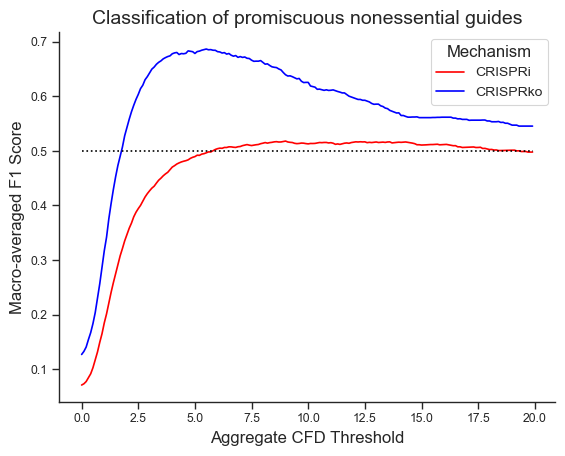

In [122]:
thresholds = np.arange(0, 20, 0.1)
group_df_list = []
for group, df in combined_agg_cfd.groupby('Mechanism'):
    f1_scores = []
    for threshold in thresholds:
        df['pred_promiscuous'] = df['Aggregate CFD Score - 1'] > threshold
        f1_scores.append(f1_score(df['promiscuous'], df['pred_promiscuous'], average='macro'))
    group_df = pd.DataFrame({'Threshold': thresholds, 'F1 Score': f1_scores})
    group_df['Mechanism'] = group
    group_df_list.append(group_df)

plot_df = pd.concat(group_df_list)
color_map = {'CRISPRi':'red','CRISPRko':'blue'}
sns.lineplot(data = plot_df, x = 'Threshold', y = 'F1 Score', hue = 'Mechanism', palette = color_map)
plt.hlines(y = 0.5, xmin = min(thresholds), xmax = max(thresholds), color = 'black', linestyles = 'dotted')
sns.despine()

plt.xlabel('Aggregate CFD Threshold',fontsize=12)
plt.ylabel('Macro-averaged F1 Score',fontsize=12)
plt.title('Classification of promiscuous nonessential guides',fontsize=14)
plt.legend(title='Mechanism', bbox_to_anchor = [1,1], title_fontsize=12, fontsize=10)

gpp.savefig('../../Figures/Figure 5/agg_cfd_crispri_vs_crisprko_f1_score.pdf', bbox_inches = 'tight', dpi = 300)